# Extracción de Datos

In [1]:
# Importamos las bibliotecas que vamos a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Definimos los arrays principales que vamos a usar
tiempos = np.array([])
temp_suncho = np.array([])
temp_compost = np.array([])
estados = np.array([])    # Apagado: 0, Prendido: 1

In [3]:
# Veamos alguno de los archivos csv como ejemplo
df_test = pd.read_csv("./measurements/data_0.csv")
display(df_test)

,Date_Time,Temp_Compost,Temp_Suncho,Estado
0,14/06/2021_18:12:22,19.94,32.75,Prendido
1,14/06/2021_18:12:23,19.94,32.88,Prendido
2,14/06/2021_18:12:25,19.94,32.88,Prendido
3,14/06/2021_18:12:27,19.94,33.00,Prendido
4,14/06/2021_18:12:28,19.94,33.06,Prendido
...,...,...,...,...
95,14/06/2021_18:14:54,20.12,46.13,Prendido
96,14/06/2021_18:14:56,20.12,46.13,Prendido
97,14/06/2021_18:14:58,20.12,46.06,Prendido
98,14/06/2021_18:14:59,20.12,46.06,Prendido


In [4]:
# Antes de llenar los arrays vamos a necesitar una función que convierta un tiempo en el formato que usamos en tiempo absoluto para poder comparar las mediciones entre sí
def convertirTiempo(t_i, t):
    dia = int(t[:2])
    mes = int(t[3:5])
    ano = int(t[6:10])
    hora = int(t[11:13])
    minuto = int(t[14:16])
    segundo = int(t[17:])
    
    t_abs = segundo + 60 * minuto + (60 ** 2) * hora + 24 * (60 ** 2) * dia + 30 * 24 * (60 ** 2) * mes + 12 * 30 * 24 * (60 ** 2) * ano
    return t_abs - t_i


# Definamos el tiempo inicial
t_i = convertirTiempo(0, "14/06/2021_18:12:22")
print(t_i)

62878011142


In [5]:
# Llenemos las listas con los datos
n = 96    # Cantidad de csv's que llenamos
for i in range(n):
    if i == 38:
        pass    # Me saltee el data_38.csv y quedo vacio sin querer
    else:
        df = pd.read_csv(f"./measurements/data_{i}.csv")

        # Temperaturas
        temp_suncho = np.concatenate((temp_suncho, np.transpose(df["Temp_Suncho"].to_numpy())))
        temp_compost = np.concatenate((temp_compost, np.transpose(df["Temp_Compost"].to_numpy())))

        # Tiempo
        for t in np.transpose(df["Date_Time"].to_numpy()):
            tiempos = np.concatenate((tiempos, np.array([convertirTiempo(t_i, t)])))

        # Estado
        for e in np.transpose(df["Estado"].to_numpy()):
            if e == "Prendido":
                estados = np.concatenate((estados, np.array([1])))
            else:
                estados = np.concatenate((estados, np.array([0])))

# Gráficos

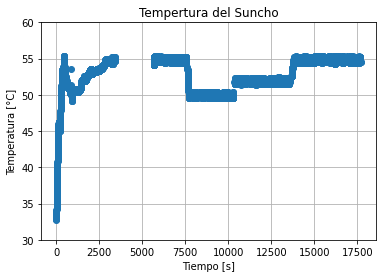

In [6]:
plt.figure("Temperatura del Suncho")
plt.title("Tempertura del Suncho")
plt.plot(tiempos, temp_suncho, "o")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.ylim([30, 60])
plt.savefig("./Figuras/Temperatura-del-Suncho.png")
plt.show()

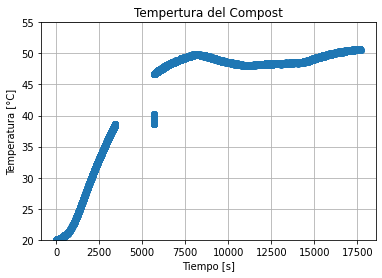

In [7]:
plt.figure("Temperatura del Compost")
plt.title("Tempertura del Compost")
plt.plot(tiempos, temp_compost, "o")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.ylim([20, 55])
plt.savefig("./Figuras/Temperatura-del-Compost.png")
plt.show()

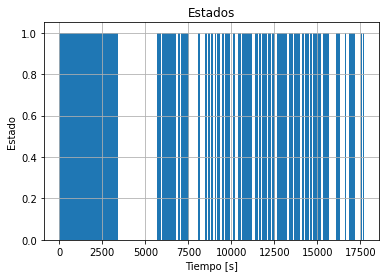

In [8]:
plt.figure("Estados")
plt.title("Estados")
plt.bar(tiempos, estados, width=2)
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("Estado")
plt.savefig("./Figuras/Estados.png")
plt.show()